In [3]:
# load the autoreload extension for IPython
# This allows you to automatically reload modules before executing code
%load_ext autoreload
%autoreload 2

import sys
import os

# Add the parent directory to the system path
sys.path.append(os.path.abspath(os.path.join('..')))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## EDA for CBE APP Reviews

In [4]:
# Import necessary modules and packages
from scripts.utils import AppName
from scripts.sentiment_analysis import SentimentAnalysis
import pandas as pd

In [5]:
# load the review data
review_data = pd.read_csv('../Data/cleaned/cbe_reviews_cleaned.csv')

#show the first few rows of the review data
review_data.head(5)


,review,rating,date,bank,source
0,v.good app,4,2025-06-09,cbe,Google Play Store
1,very good app,1,2025-06-09,cbe,Google Play Store
2,Very amazing app indeed. I'm enjoying it,5,2025-06-08,cbe,Google Play Store
3,Best,5,2025-06-08,cbe,Google Play Store
4,20 years,5,2025-06-08,cbe,Google Play Store


In [6]:
# create an instance of the SentimentAnalysis class
analysis = SentimentAnalysis(review_data, AppName.CBE)

Checking for NLTK resources...
NLTK resources not found. Downloading...
NLTK resources downloaded.


In [7]:
# Preprocess review text
analysis.preprocess_reviews()
review_data.head(5)

Preprocessing reviews...
Reviews preprocessed. Tokens extracted.


,review,rating,date,bank,source,processed_review
0,v.good app,4,2025-06-09,cbe,Google Play Store,app
1,very good app,1,2025-06-09,cbe,Google Play Store,good app
2,Very amazing app indeed. I'm enjoying it,5,2025-06-08,cbe,Google Play Store,amazing app indeed enjoying
3,Best,5,2025-06-08,cbe,Google Play Store,best
4,20 years,5,2025-06-08,cbe,Google Play Store,20 year


In [8]:
# Sentiment analysis using VADER
analysis.compute_vader_sentiment()
review_data.head(5)

Computing VADER sentiment scores...
VADER sentiment scores computed.


,review,rating,date,bank,source,processed_review,vader_score,vader_sentiment
0,v.good app,4,2025-06-09,cbe,Google Play Store,app,0.0000,neutral
1,very good app,1,2025-06-09,cbe,Google Play Store,good app,0.4404,positive
2,Very amazing app indeed. I'm enjoying it,5,2025-06-08,cbe,Google Play Store,amazing app indeed enjoying,0.8020,positive
3,Best,5,2025-06-08,cbe,Google Play Store,best,0.6369,positive
4,20 years,5,2025-06-08,cbe,Google Play Store,20 year,0.0000,neutral


In [9]:
# Sentiment analysis using Text Blob
analysis.compute_textblob_sentiment()
review_data.head(5)

Computing TextBlob sentiment scores...
TextBlob sentiment scores computed.


,review,rating,date,bank,source,processed_review,vader_score,vader_sentiment,textblob_score,textblob_sentiment
0,v.good app,4,2025-06-09,cbe,Google Play Store,app,0.0000,neutral,0.00,neutral
1,very good app,1,2025-06-09,cbe,Google Play Store,good app,0.4404,positive,0.70,positive
2,Very amazing app indeed. I'm enjoying it,5,2025-06-08,cbe,Google Play Store,amazing app indeed enjoying,0.8020,positive,0.55,positive
3,Best,5,2025-06-08,cbe,Google Play Store,best,0.6369,positive,1.00,positive
4,20 years,5,2025-06-08,cbe,Google Play Store,20 year,0.0000,neutral,0.00,neutral


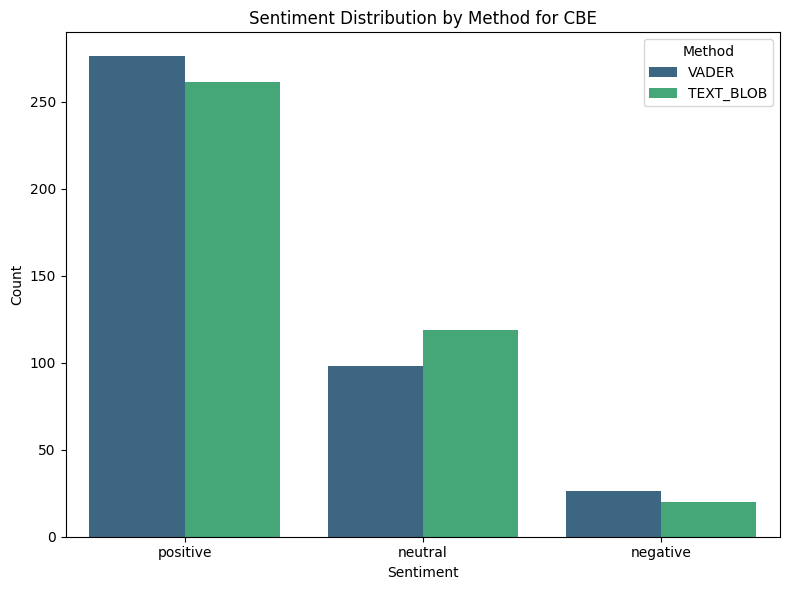

In [14]:
# Visualize sentiment distribution for all sentiment algorithms
analysis.plot_sentiment_distribution()